# Auto MPG Exploratory Data Analysis

This notebook loads the Auto MPG dataset, cleans it, and performs exploratory data analysis to investigate distributions and relationships between variables.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Column names based on auto-mpg.names
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
    'acceleration', 'model_year', 'origin', 'car_name'
]

df = pd.read_csv('auto-mpg.data', sep=r'\s+', names=column_names)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Correcting Missing Horsepower Values

In [85]:
df['horsepower'] = df['horsepower'].replace('?', pd.NA)
df['horsepower'] = pd.to_numeric(df['horsepower'])

df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name


### Converting Origin Codes to Labels

In [ ]:
origin_map = {1: 'USA', 2: 'Asia', 3: 'Europe'}
df['origin'] = df['origin'].map(origin_map)

df['origin'].head()

0    USA
1    USA
2    USA
3    USA
4    USA
Name: origin, dtype: object

### Distribution of Cylinders

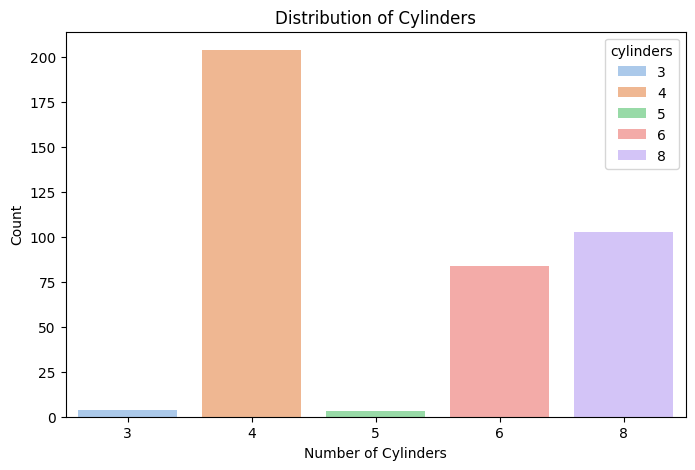

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='cylinders', data=df, palette='pastel',  hue='cylinders')
plt.title('Distribution of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.show()

This bar chart shows that cars with 4 cylinders are the most common in the dataset, while 8- and 6-cylinder cars appear at about half that amount. Vehicles with 3 or 5 cylinders are the rarest, indicating that most cars were designed with moderate engine sizes.

### Scatterplot of Horsepower vs Weight

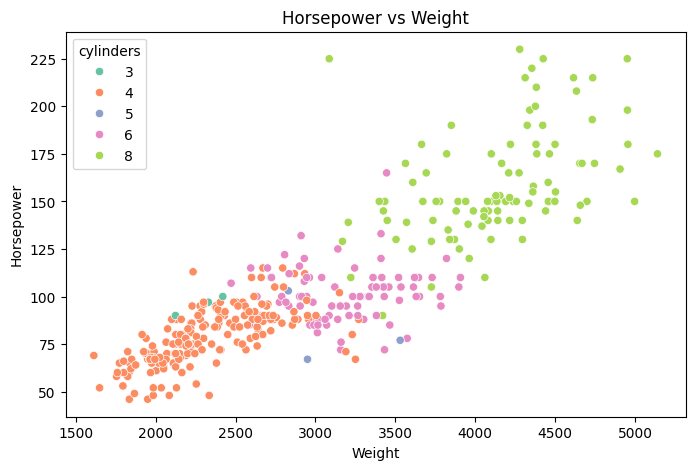

In [83]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='weight', y='horsepower', data=df, hue='cylinders', palette='Set2')
plt.title('Horsepower vs Weight')
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.show()


The scatter plot shows a clear positive correlation: as weight increases, horsepower also increases. Cars with more cylinders cluster toward the upper-right (heavier and more powerful), while 4-cylinder vehicles are concentrated on the lower-left (lighter and less powerful).

### Question: How does fuel efficiency (MPG) vary across different origins and over model years?

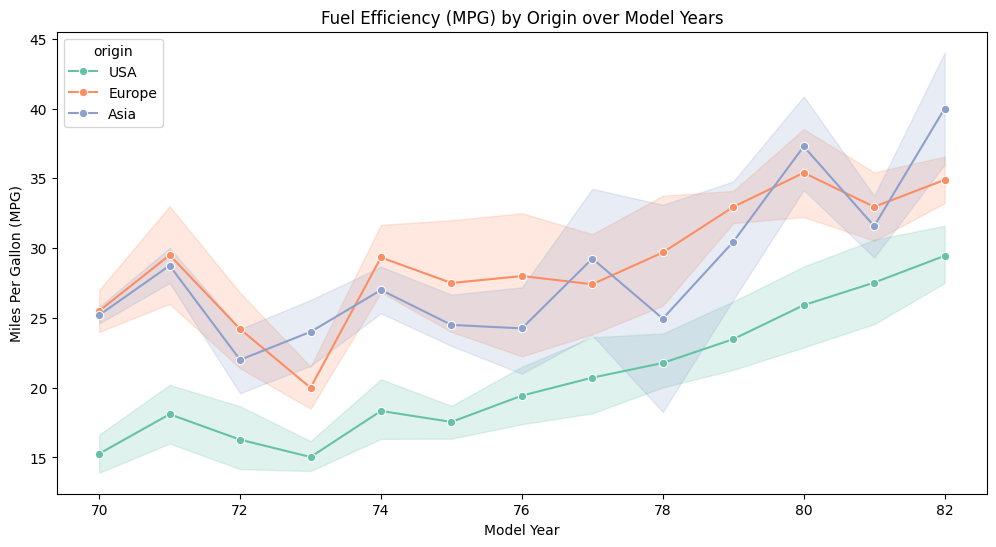

In [87]:
plt.figure(figsize=(12,6))
sns.lineplot(x='model_year', y='mpg', hue='origin', data=df, marker='o', palette='Set2')
plt.title('Fuel Efficiency (MPG) by Origin over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()


Fuel efficiency increased steadily between 1970 and 1982 for all regions. Asian manufacturers consistently produced more fuel-efficient cars throughout the period. European cars followed similar improvement trends, while American cars started with the lowest MPG but showed strong improvement after the mid-1970s.